In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['figure.figsize'] = 10,6

import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow.keras as K

from utilities.dataset.load_files import get_file_lists
from utilities.dataset.make_dataset import make_dataset

In [2]:
# Load in all test data
data_directory = "/home/tye/data/numpy/fake/data1002/"
file_lists = get_file_lists(data_directory)
list_X_test, list_Y_test = file_lists['test']

In [3]:
X = np.array([np.load(fname) for fname in list_X_test])
X = X.reshape(173000,4096)

Y = np.array([np.load(fname) for fname in list_Y_test])
Y = Y.reshape(173000,4096)

In [4]:
gen_n2c = load_model("saved_models/final/generator_n2c_19", custom_objects={'tf': tf})
gen_c2n = load_model("saved_models/final/generator_c2n_19", custom_objects={'tf': tf})

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1059: UserWarning: networks.generator is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [5]:
D = gen_n2c.predict(X)

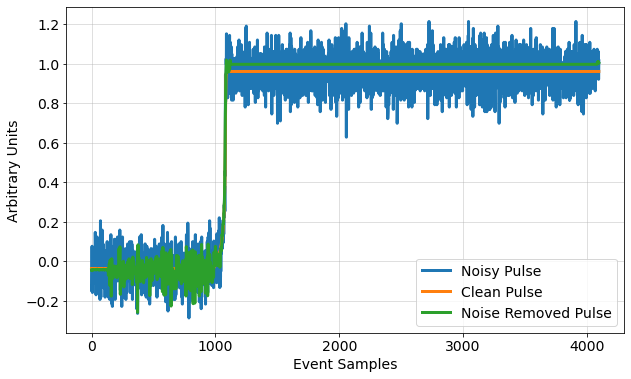

In [11]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(D[i], label="Noise Removed Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
# plt.show()

plt.savefig('n2c_final.png')

In [7]:
N = gen_c2n.predict(Y)

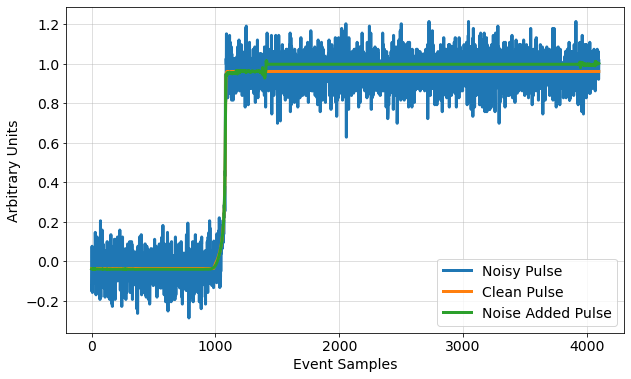

In [12]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(N[i], label="Noise Added Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
# plt.show()
plt.savefig('c2n_final.png')

### calculating the mean squared error for comparison

In [13]:
MSE = np.mean(np.square(X - D), axis=-1)

In [14]:
MSE

array([0.02816463, 0.0061849 , 0.00792256, ..., 0.00621875, 0.00742982,
       0.01945554], dtype=float32)

In [15]:
MSE_final = np.mean(MSE)

In [16]:
MSE_final

0.010507528